# 2. Data Manipulation
# 2.2. Quality of scraping data

In [82]:
import pandas as pd
import numpy as np
import os

In [83]:
%run "0.1. Intro_Visualization style.ipynb"

In [84]:
%run "2.0. DataManipulation_Functions.ipynb"

In [85]:
folder = 'C:/University of Michigan/SIADS 593 Milestone 1/Project/Primary data'
files = os.listdir(folder)
files

['0-15_output_scraping_cleaned.csv',
 '105-120_output_scraping_cleaned.csv',
 '120-135_output_scraping_cleaned.csv',
 '135-150_output_scraping_cleaned.csv',
 '15-30_output_scraping_cleaned.csv',
 '150-165_output_scraping_cleaned.csv',
 '165-180_output_scraping_cleaned.csv',
 '180-195_output_scraping_cleaned.csv',
 '195-210_output_scraping_cleaned.csv',
 '210-225_output_scraping_cleaned.csv',
 '225-240_output_scraping_cleaned.csv',
 '240-255_output_scraping_cleaned.csv',
 '255-270_output_scraping_cleaned.csv',
 '270-285_output_scraping_cleaned.csv',
 '285-300_output_scraping_cleaned.csv',
 '30-45_output_scraping_cleaned.csv',
 '300-315_output_scraping_cleaned.csv',
 '315-330_output_scraping_cleaned.csv',
 '330-345_output_scraping_cleaned.csv',
 '345-360_output_scraping_cleaned.csv',
 '45-60_output_scraping_cleaned.csv',
 '60-75_output_scraping_cleaned.csv',
 '75-90_output_scraping_cleaned.csv',
 '90-105_output_scraping_cleaned.csv']

## Data loading

In [86]:
df_scraped = load_clean_scraped_data(folder)

In [87]:
df_scraped.head(3)

,id_in_source_file,date,tags_top,title,url,body,tags_bottom,video_duration_seconds,file_key,datetime,dat,year,year_month,hour,weekday,whole newscast
0,15,2023-01-27 21:45:00,Общество,Выпуск программы «Время» в 21:00 от 27.01.2023,https://www.1tv.ru/news/2023-01-27/446104-vypu...,Смотрите в этом выпуске: 79 лет назад была пол...,Общество,2422.0,0-15,2023-01-27 21:45:00,2023-01-27,2023,2023-01,21,4,True
1,16,2023-01-27 21:35:00,Культура,В Москве проходит церемония вручения премии «З...,https://www.1tv.ru/news/2023-01-27/446121-v_mo...,Событие в мире отечественного кино. В Москве в...,"Культура,Кино,Марина Зудина,Екатерина Климова,...",290.0,0-15,2023-01-27 21:35:00,2023-01-27,2023,2023-01,21,4,False
2,20,2023-01-27 21:34:00,Спорт,В Туле появился новый футбольный манеж,https://www.1tv.ru/news/2023-01-27/446120-v_tu...,Футбольный манеж в Туле — искусственный газон ...,"Спорт,Регионы,Футбол,Алексей Дюмин,Тульская об...",48.0,0-15,2023-01-27 21:34:00,2023-01-27,2023,2023-01,21,4,False


In [88]:
df_scraped['dat'] = pd.to_datetime(df_scraped['dat'])
df_scraped['video_duration_min'] = df_scraped['video_duration_seconds'] / 60

In [89]:
df_scraped.shape

(359041, 17)

In [90]:
df_scraped.describe()

,id_in_source_file,video_duration_seconds,year,hour,weekday,video_duration_min
count,359041.000000,314073.000000,359041.000000,359041.000000,359041.000000,314073.000000
mean,7508.671405,157.577331,2014.384154,14.459062,2.579984,2.626289
std,4320.757624,285.130063,4.563075,4.777690,1.828797,4.752168
min,0.000000,0.000000,2006.000000,0.000000,0.000000,0.000000
25%,3768.000000,38.000000,2011.000000,10.000000,1.000000,0.633333
50%,7508.000000,67.000000,2014.000000,15.000000,3.000000,1.116667
75%,11248.000000,201.000000,2018.000000,18.000000,4.000000,3.350000
max,15014.000000,11399.000000,2023.000000,23.000000,6.000000,189.983333


## Checking outliers

In [91]:
pd.reset_option('display.max_colwidth')
df_scraped[df_scraped['video_duration_seconds'] > 10000]

,id_in_source_file,date,tags_top,title,url,body,tags_bottom,video_duration_seconds,file_key,datetime,dat,year,year_month,hour,weekday,whole newscast,video_duration_min
16946,1857,2022-05-09 17:12:00,Общество,Выпуск новостей в 13:50 от 09.05.2022,https://www.1tv.ru/news/2022-05-09/428383-vypu...,Смотрите в этом выпуске: в Кремле президент вр...,Общество,11399.0,15-30,2022-05-09 17:12:00,2022-05-09,2022,2022-05,17,0,True,189.983333


After examining the outlier in the dataset, we concluded that it is not a mistake and should be kept in the analysis. The First Channel had a 3 hours newscast on 2022-05-09, which is a Victory Day over Nazi Germany in Russia. This outliers reflects an important characteristic of Russian propaganda that seeks to use national pride and historical events to unite the population. Therefore, removing the outlier would lead to a loss of valuable information and potentially bias the analysis. 

In [92]:
df_scraped[df_scraped['video_duration_seconds']==0]

,id_in_source_file,date,tags_top,title,url,body,tags_bottom,video_duration_seconds,file_key,datetime,dat,year,year_month,hour,weekday,whole newscast,video_duration_min
314474,408,2009-03-01 21:01:00,Экономика,Владимир Путин обсудил с руководством «Единой ...,https://www.1tv.ru/news/2009-03-01/169871-vlad...,Экономика остается в центре внимания политиков...,Экономика,0.0,315-330,2009-03-01 21:01:00,2009-03-01,2009,2009-03,21,6,False,0.0
337018,7984,2008-02-03 21:43:00,В мире,Европейские целостности: Сербия выбирает между...,https://www.1tv.ru/news/2008-02-03/196380-evro...,"В Сербии второй тур выборов президента, борьбу...",В мире,0.0,330-345,2008-02-03 21:43:00,2008-02-03,2008,2008-02,21,6,False,0.0
348766,4711,2007-06-13 14:28:00,NaN,Как правильно наказывать ребенка? Советы психо...,https://www.1tv.ru/news/2007-06-13/209008-kak_...,В Америке пятилетний ребенок сдал отца полицей...,Другие новости,0.0,345-360,2007-06-13 14:28:00,2007-06-13,2007,2007-06,14,2,False,0.0


Although the values for the "video_duration_seconds" column were not loaded properly for these three rows, this will not have a significant impact on our analysis. We plan to use data on video duration starting from 2011, and these three rows fall outside of that range. Therefore, the mistake will not affect our analysis, and we can proceed with confidence that our results will not be skewed by this issue.

### Plotting time series to check for strange values or anomalies in a dataset

In [93]:
# Calculate total news duration per day
news_duration = df_scraped.groupby('dat')[['video_duration_min']].sum()

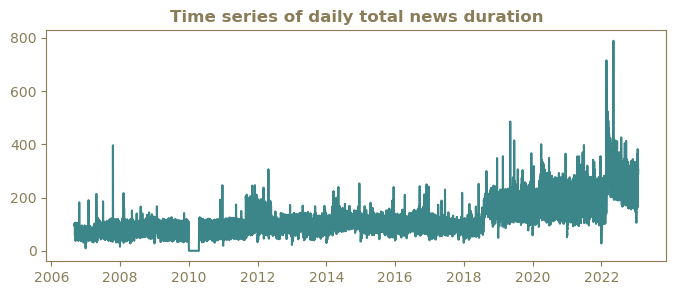

In [94]:
# Draw timeseries of daily news duration

plt.figure(figsize=(8, 3))
plt.plot(news_duration.index, news_duration['video_duration_min'], 
         c=color_1, label='total duration');
plt.title('Time series of daily total news duration');

In [95]:
news_duration['year'] = news_duration.index.year
news_duration[news_duration['year']==2010]

,video_duration_min,year
dat,,
2010-01-01,21.766667,2010
2010-01-02,0.000000,2010
2010-01-03,0.000000,2010
2010-01-04,0.000000,2010
2010-01-05,0.000000,2010
...,...,...
2010-12-27,113.966667,2010
2010-12-28,109.733333,2010
2010-12-29,110.416667,2010


In [96]:
# Find for what period we don't have video duration
news_duration[(news_duration['year']==2010)&(news_duration['video_duration_min']==0)].index

DatetimeIndex(['2010-01-02', '2010-01-03', '2010-01-04', '2010-01-05',
               '2010-01-06', '2010-01-07', '2010-01-08', '2010-01-09',
               '2010-01-10', '2010-01-11',
               ...
               '2010-04-09', '2010-04-10', '2010-04-11', '2010-04-12',
               '2010-04-13', '2010-04-14', '2010-04-15', '2010-04-16',
               '2010-04-17', '2010-04-18'],
              dtype='datetime64[ns]', name='dat', length=107, freq=None)

There is a gap in the video duration data for the period from 2010-01-02 to 2010-04-18. The reason is that the First Channel did not upload videos during this time. However, since we are planning to use information on video duration starting from 2011, this mistake should not impact our results. We can proceed with the understanding that our analysis will not be affected by this gap in the data.

## Missing values

In [97]:
df_scraped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359041 entries, 0 to 359040
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id_in_source_file       359041 non-null  int64         
 1   date                    359041 non-null  object        
 2   tags_top                335525 non-null  object        
 3   title                   359041 non-null  object        
 4   url                     359041 non-null  object        
 5   body                    359041 non-null  object        
 6   tags_bottom             356653 non-null  object        
 7   video_duration_seconds  314073 non-null  float64       
 8   file_key                359041 non-null  object        
 9   datetime                359041 non-null  datetime64[ns]
 10  dat                     359041 non-null  datetime64[ns]
 11  year                    359041 non-null  int64         
 12  year_month              359041

In [98]:
# We can see that the column 'video_duration_seconds' has missing values
df_scraped['video_missing'] = np.where(df_scraped['video_duration_seconds'].isnull(),
                                      1,0)

In [99]:
df_scraped.groupby('year')['video_missing'].agg([sum, len])

,sum,len
year,,
2006,74,4333
2007,1147,16134
2008,2840,20598
2009,4175,22675
2010,8495,21736
2011,4031,26277
2012,3571,26907
2013,3444,25345
2014,3206,24584


Upon conducting a random check, it was discovered that the missing values were not caused by errors in our scraping, but rather by the First Channel's failure to post videos. 

The number of missing values for the years 2021-2023 is negligible, which means that our analysis results during these years should be reliable. However, for previous years, the number of missing values is significant, which could potentially result in biased outcomes. It's important to be aware of this fact and approach the results with caution.